In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.random.seed(0)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

# Simple CNN for Edgelovers

## a) Generation of data

In [2]:
def generate_data(xlen, ylen, n):
    data = np.zeros(shape=(n, xlen, ylen, 1), dtype=np.uint8)
    labels = np.zeros(shape=(n), dtype=np.int).squeeze()
    
    for i in range(n):
        img = np.random.random((xlen, ylen, 1)) * 128
        
        v_or_h = np.random.randint(0, 2)
        lines = 10
        
        if v_or_h: # horizontal
            label = 0.0
            for _ in range(lines):
                y = np.random.randint(2, ylen - 2)
                x1 = np.random.randint(2, xlen - 10)
                x2 = x1 + 10
                img[y, x1:x2] = 255.0
        else:  # vertical
            label = 1.0
            for _ in range(lines):
                x = np.random.randint(2, xlen - 2)
                y1 = np.random.randint(2, ylen - 10)
                y2 = y1 + 10
                img[y1:y2, x] = 255.0
        
        data[i] = img.copy()
        labels[i] = label
    return data, labels.squeeze()

In [3]:
x0, y0 = generate_data(50, 50, 1000)
x2, y2 = generate_data(50, 50, 1000);

Label: 0


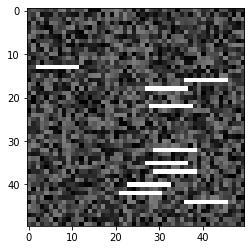

In [4]:
img = x0[0, :, :, 0]
plt.imshow(img, cmap='gray')
print("Label: {}".format(y0[0]))

## b) Build the simplest possible CNN

In [27]:
n_kernel = 2
n_epochs = 1000
batch_size = 5
lr = 0.1

model = Sequential()
model.add(Conv2D(n_kernel, kernel_size=5, strides=2, activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=8, strides=8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 2)         52        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 2)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 1000 samples, validate on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 28.7333 - accuracy: 0.4880 - val_loss: 10.1061 - val_accuracy: 0.5580
Epoch 2/1000
1000/1000 [==============================] - 1s 766us/sample - loss: 7.3622 - accuracy: 0.6150 - val_loss: 4.9884 - val_accuracy: 0.6610
Epoch 3/1000
1000/1000 [==============================] - 1s 770us/sample - loss: 4.2121 - accuracy: 0.7010 - val_loss: 3.2294 - val_accuracy: 0.7440
Epoch 4/1000
1000/1000 [==============================] - 1s 764us/sample - loss: 2.9812 - accuracy: 0.7430 - val_loss: 2.4926 - val_accuracy: 0.7870
Epoch 5/1000
1000/1000 [==============================] - 1s 801us/sample - loss: 2.2238 - accuracy: 0.7890 - val_loss: 2.0086 - val_accuracy: 0.8130
Epoch 6/1000
1000/1000 [==============================] - 1s 775us/sample - loss: 1.8568 - accuracy: 0.8140 - val_loss: 1.6672 - val_accuracy: 0.8330
Epoch 7/1000
1000/1000 [============================

Epoch 55/1000
1000/1000 [==============================] - 1s 726us/sample - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9840
Epoch 56/1000
1000/1000 [==============================] - 1s 731us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9850
Epoch 57/1000
1000/1000 [==============================] - 1s 729us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9830
Epoch 58/1000
1000/1000 [==============================] - 1s 728us/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9840
Epoch 59/1000
1000/1000 [==============================] - 1s 726us/sample - loss: 0.0754 - accuracy: 0.9840 - val_loss: 0.0664 - val_accuracy: 0.9800
Epoch 60/1000
1000/1000 [==============================] - 1s 727us/sample - loss: 0.0253 - accuracy: 0.9960 - val_loss: 0.0444 - val_accuracy: 0.9840
Epoch 61/1000
1000/1000 [==============================] - 1s 727us/sample - loss: 0.0161 - ac

Epoch 163/1000
1000/1000 [==============================] - 1s 808us/sample - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 164/1000
1000/1000 [==============================] - 1s 895us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 165/1000
1000/1000 [==============================] - 1s 827us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 166/1000
1000/1000 [==============================] - 1s 829us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 167/1000
1000/1000 [==============================] - 1s 787us/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 168/1000
1000/1000 [==============================] - 1s 780us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 169/1000
1000/1000 [==============================] - 1s 739us/sample - loss: 0.00

Epoch 269/1000
1000/1000 [==============================] - 1s 840us/sample - loss: 5.9997e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9990
Epoch 270/1000
1000/1000 [==============================] - 1s 846us/sample - loss: 5.7953e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 271/1000
1000/1000 [==============================] - 1s 780us/sample - loss: 5.7150e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9990
Epoch 272/1000
1000/1000 [==============================] - 1s 764us/sample - loss: 5.5910e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9990
Epoch 273/1000
1000/1000 [==============================] - 1s 788us/sample - loss: 5.4259e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9990
Epoch 274/1000
1000/1000 [==============================] - 1s 792us/sample - loss: 5.2561e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9990
Epoch 275/1000
1000/1000 [==============================] - 1s 8

1000/1000 [==============================] - 1s 998us/sample - loss: 5.7409e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 374/1000
1000/1000 [==============================] - 1s 862us/sample - loss: 5.6622e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 375/1000
1000/1000 [==============================] - 1s 921us/sample - loss: 5.5765e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 376/1000
1000/1000 [==============================] - 1s 769us/sample - loss: 5.4868e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9990
Epoch 377/1000
1000/1000 [==============================] - 1s 791us/sample - loss: 5.4113e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 378/1000
1000/1000 [==============================] - 1s 799us/sample - loss: 5.2940e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 379/1000
1000/1000 [==============================] - 1s 765us/sample - l

1000/1000 [==============================] - 1s 773us/sample - loss: 6.4355e-04 - accuracy: 1.0000 - val_loss: 7.8945e-04 - val_accuracy: 1.0000
Epoch 478/1000
1000/1000 [==============================] - 1s 781us/sample - loss: 6.3421e-04 - accuracy: 1.0000 - val_loss: 7.8512e-04 - val_accuracy: 1.0000
Epoch 479/1000
1000/1000 [==============================] - 1s 768us/sample - loss: 6.2424e-04 - accuracy: 1.0000 - val_loss: 7.7763e-04 - val_accuracy: 1.0000
Epoch 480/1000
1000/1000 [==============================] - 1s 783us/sample - loss: 6.1234e-04 - accuracy: 1.0000 - val_loss: 7.6500e-04 - val_accuracy: 1.0000
Epoch 481/1000
1000/1000 [==============================] - 1s 763us/sample - loss: 6.0068e-04 - accuracy: 1.0000 - val_loss: 7.5816e-04 - val_accuracy: 1.0000
Epoch 482/1000
1000/1000 [==============================] - 1s 777us/sample - loss: 5.8786e-04 - accuracy: 1.0000 - val_loss: 7.7355e-04 - val_accuracy: 1.0000
Epoch 483/1000
1000/1000 [=============================

1000/1000 [==============================] - 1s 775us/sample - loss: 4.8115e-04 - accuracy: 1.0000 - val_loss: 6.2424e-04 - val_accuracy: 1.0000
Epoch 580/1000
1000/1000 [==============================] - 1s 747us/sample - loss: 4.7634e-04 - accuracy: 1.0000 - val_loss: 6.2624e-04 - val_accuracy: 1.0000
Epoch 581/1000
1000/1000 [==============================] - 1s 744us/sample - loss: 4.7095e-04 - accuracy: 1.0000 - val_loss: 6.4387e-04 - val_accuracy: 1.0000
Epoch 582/1000
1000/1000 [==============================] - 1s 808us/sample - loss: 4.6491e-04 - accuracy: 1.0000 - val_loss: 6.0939e-04 - val_accuracy: 1.0000
Epoch 583/1000
1000/1000 [==============================] - 1s 793us/sample - loss: 4.5852e-04 - accuracy: 1.0000 - val_loss: 6.2085e-04 - val_accuracy: 1.0000
Epoch 584/1000
1000/1000 [==============================] - 1s 752us/sample - loss: 4.5219e-04 - accuracy: 1.0000 - val_loss: 6.1634e-04 - val_accuracy: 1.0000
Epoch 585/1000
1000/1000 [=============================

1000/1000 [==============================] - 1s 1ms/sample - loss: 6.7975e-04 - accuracy: 1.0000 - val_loss: 7.0278e-04 - val_accuracy: 1.0000
Epoch 683/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 6.7589e-04 - accuracy: 1.0000 - val_loss: 7.0116e-04 - val_accuracy: 1.0000
Epoch 684/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 6.7303e-04 - accuracy: 1.0000 - val_loss: 6.9931e-04 - val_accuracy: 1.0000
Epoch 685/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 6.7015e-04 - accuracy: 1.0000 - val_loss: 6.9757e-04 - val_accuracy: 1.0000
Epoch 686/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 6.6733e-04 - accuracy: 1.0000 - val_loss: 6.9600e-04 - val_accuracy: 1.0000
Epoch 687/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 6.6420e-04 - accuracy: 1.0000 - val_loss: 6.9360e-04 - val_accuracy: 1.0000
Epoch 688/1000
1000/1000 [==============================] - 2s 2ms/

Epoch 734/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.9190e-04 - accuracy: 1.0000 - val_loss: 6.5648e-04 - val_accuracy: 1.0000
Epoch 735/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.8769e-04 - accuracy: 1.0000 - val_loss: 6.5644e-04 - val_accuracy: 1.0000
Epoch 736/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.8146e-04 - accuracy: 1.0000 - val_loss: 6.8750e-04 - val_accuracy: 1.0000
Epoch 737/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.7483e-04 - accuracy: 1.0000 - val_loss: 6.7755e-04 - val_accuracy: 1.0000
Epoch 738/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.6755e-04 - accuracy: 1.0000 - val_loss: 6.7682e-04 - val_accuracy: 1.0000
Epoch 739/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.5849e-04 - accuracy: 1.0000 - val_loss: 6.6274e-04 - val_accuracy: 1.0000
Epoch 740/1000
1000/1000 [==========================

Epoch 786/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 4.7481e-04 - accuracy: 1.0000 - val_loss: 6.7471e-04 - val_accuracy: 1.0000
Epoch 787/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.6275e-04 - accuracy: 1.0000 - val_loss: 6.5772e-04 - val_accuracy: 1.0000
Epoch 788/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 4.5079e-04 - accuracy: 1.0000 - val_loss: 7.0347e-04 - val_accuracy: 1.0000
Epoch 789/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.3746e-04 - accuracy: 1.0000 - val_loss: 7.3161e-04 - val_accuracy: 1.0000
Epoch 790/1000
1000/1000 [==============================] - 1s 1ms/sample - loss: 4.2429e-04 - accuracy: 1.0000 - val_loss: 6.8667e-04 - val_accuracy: 1.0000
Epoch 791/1000
1000/1000 [==============================] - 2s 2ms/sample - loss: 4.1093e-04 - accuracy: 1.0000 - val_loss: 7.4637e-04 - val_accuracy: 1.0000
Epoch 792/1000
1000/1000 [==========================

Epoch 838/1000
1000/1000 [==============================] - 1s 836us/sample - loss: 3.3995e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 839/1000
1000/1000 [==============================] - 1s 851us/sample - loss: 3.2743e-04 - accuracy: 1.0000 - val_loss: 9.8213e-04 - val_accuracy: 1.0000
Epoch 840/1000
1000/1000 [==============================] - 1s 747us/sample - loss: 3.1667e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 841/1000
1000/1000 [==============================] - 1s 754us/sample - loss: 0.0287 - accuracy: 0.9920 - val_loss: 0.0211 - val_accuracy: 0.9930
Epoch 842/1000
1000/1000 [==============================] - 1s 740us/sample - loss: 9.6085e-04 - accuracy: 1.0000 - val_loss: 7.4072e-04 - val_accuracy: 1.0000
Epoch 843/1000
1000/1000 [==============================] - 1s 742us/sample - loss: 6.9190e-04 - accuracy: 1.0000 - val_loss: 7.3841e-04 - val_accuracy: 1.0000
Epoch 844/1000
1000/1000 [==============================

Epoch 890/1000
1000/1000 [==============================] - 1s 807us/sample - loss: 6.9469e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 891/1000
1000/1000 [==============================] - 1s 745us/sample - loss: 6.8832e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 892/1000
1000/1000 [==============================] - 1s 750us/sample - loss: 6.8121e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 893/1000
1000/1000 [==============================] - 1s 757us/sample - loss: 6.7412e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9990
Epoch 894/1000
1000/1000 [==============================] - 1s 765us/sample - loss: 6.6671e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 895/1000
1000/1000 [==============================] - 1s 742us/sample - loss: 6.5805e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9990
Epoch 896/1000
1000/1000 [==============================] - 1s 7

Epoch 942/1000
1000/1000 [==============================] - 1s 768us/sample - loss: 6.7919e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 943/1000
1000/1000 [==============================] - 1s 768us/sample - loss: 6.5146e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 944/1000
1000/1000 [==============================] - 1s 746us/sample - loss: 6.4515e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 945/1000
1000/1000 [==============================] - 1s 756us/sample - loss: 6.4003e-04 - accuracy: 1.0000 - val_loss: 9.6326e-04 - val_accuracy: 1.0000
Epoch 946/1000
1000/1000 [==============================] - 1s 757us/sample - loss: 6.3541e-04 - accuracy: 1.0000 - val_loss: 9.1753e-04 - val_accuracy: 1.0000
Epoch 947/1000
1000/1000 [==============================] - 1s 793us/sample - loss: 6.3056e-04 - accuracy: 1.0000 - val_loss: 8.9197e-04 - val_accuracy: 1.0000
Epoch 948/1000
1000/1000 [==========================

In [30]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.0005538827106356621
Accuracy train set: 1.0

Loss validation set: 0.0007399828699417412
Accuracy validation set: 1.0



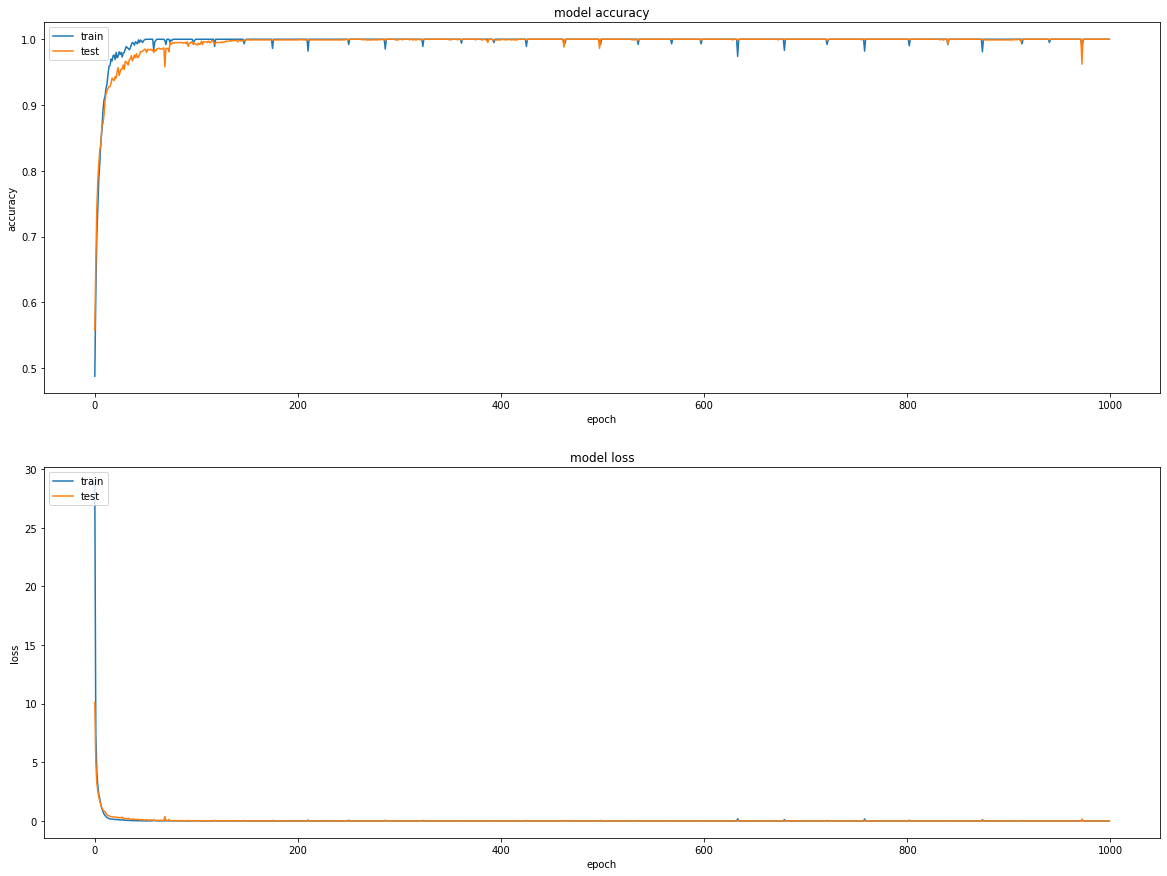

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

## c) Visualize the learned kernel

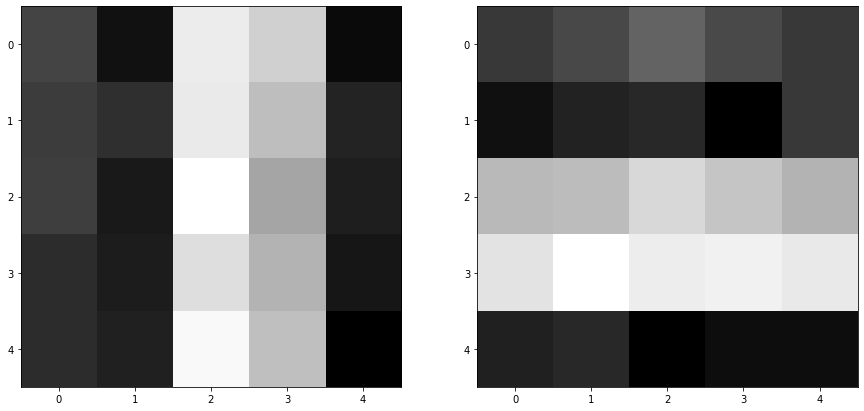

In [32]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        axes[j].imshow(f, cmap='gray');
        count += 1

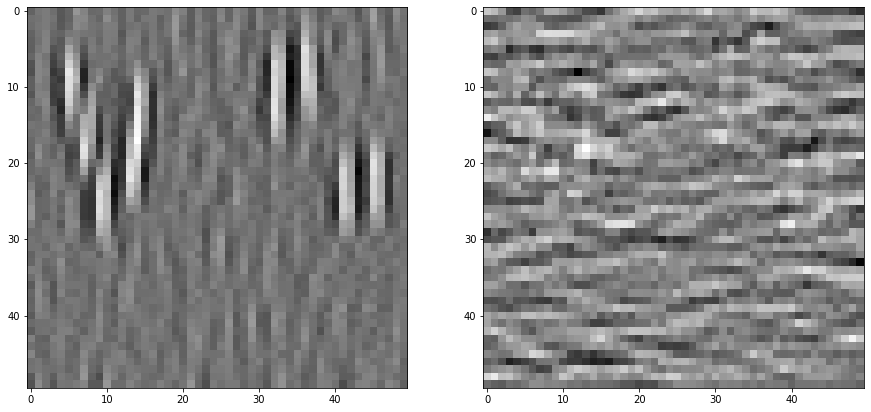

In [33]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 1)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1

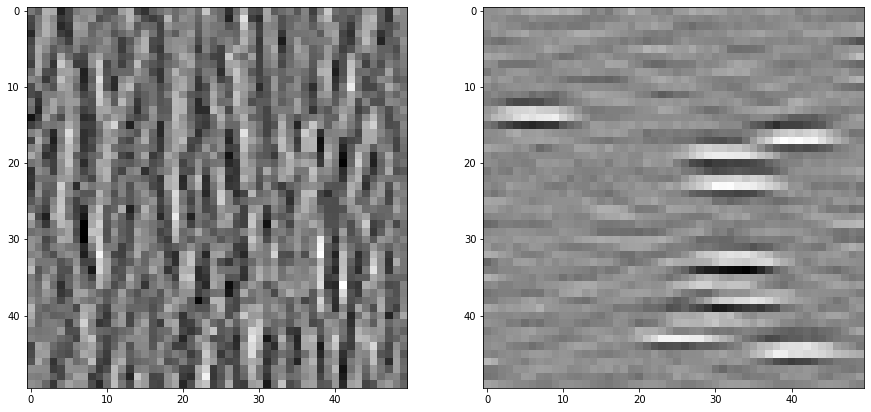

In [34]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

nrows, ncols = 1, 2
count = 0
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i in range(nrows):
    for j in range(ncols):
        f = filters[:, :, 0, count]
        index = np.where(y0 == 0)[0][0]
        img = x0[index, :, :, 0]
        grad = signal.convolve2d(img, f, boundary='symm', mode='same')
        axes[j].imshow(grad, cmap='gray')
        count += 1